In [42]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os, sys
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import utils
from pathlib import Path
import mplhep

sys.path.append("../../../analysisTools/")
import plotTools as ptools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
def add_signal_info_to_df(df):
    m1_list = []
    delta_list = []
    ctau_list = []
    
    for point in df.index.values:
        sig_dict = ptools.signalPoint(point)
        m1_list.append(sig_dict['m1'])
        delta_list.append(sig_dict['delta'])
        ctau_list.append(sig_dict['ctau'])
    
    df['m1'] = m1_list
    df['delta'] = delta_list
    df['ctau'] = ctau_list
    
    df = df.sort_values(by=['m1']) # sort by m1

    return df

In [44]:
def save_df_to_csv(df, outdir, outname, isSignal = False):
    Path(outdir).mkdir(parents=True, exist_ok=True)

    if isSignal:
        df = add_signal_info_to_df(df)
    
    df.to_csv(f'{outdir}/{outname}.csv')

    print(f'Saved: {outdir}/{outname}.csv')

# Plot 1D: True Best vertex vs. False Best vertex in gen-ee reconstructed events

In [45]:
prefix = './coffea/skimmed/'

In [46]:
# Signal
sig_histo_best = util.load(f'{prefix}/SR_ISRcuts_BestVertex_fewMass.coffea')[0]
sig_histo_true = util.load(f'{prefix}/SR_ISRcuts_TrueVertex_fewMass.coffea')[0]
#sig_histo_false = util.load(f'{prefix}/SR_ISRcuts_FalseAndMinChi2Vertex_genEEreconstructed.coffea')[0]

In [47]:
prefix = './coffea/skimmed/'
suffix = '_SR_BDTLxy_BestVertex'

In [48]:
# Background
bkg_files = {
    "QCD": "bkg_2018_QCD_TuneCP5_PSWeights", # No entry for QCD
    "Top": "bkg_2018_Top",
    "DY": "bkg_2018_DY",
    "Diboson": "bkg_2018_Diboson",
    "Triboson": "bkg_2018_Triboson",
    "W+jets": "bkg_2018_WJets",
    "Z+jets": "bkg_2018_ZJets",
}

bkg_histos = {}

for b in bkg_files.keys():
    bkg_histos[b] = util.load(f'{prefix}/{bkg_files[b]}{suffix}.coffea')[0]

In [49]:
# example dictionaries for plotting

plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogx': False,
    'doLogy': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

### ctau

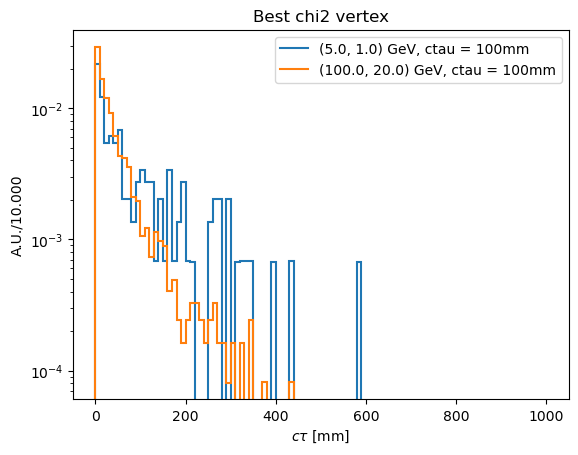

In [50]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 100j,
    'xlim': [0,1000],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

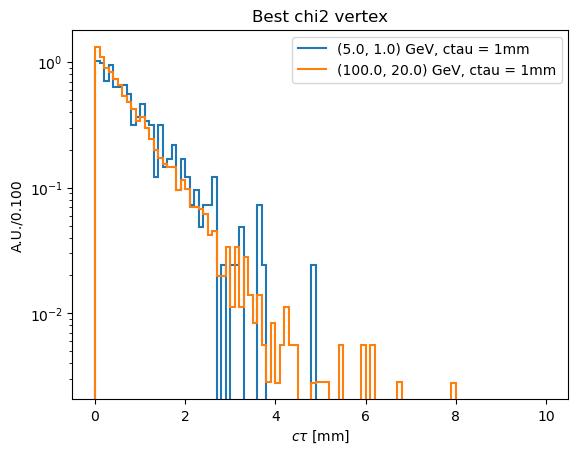

In [51]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

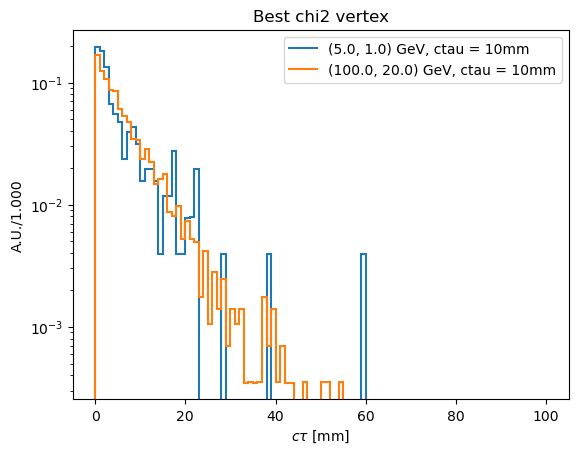

In [52]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,100],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [10]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

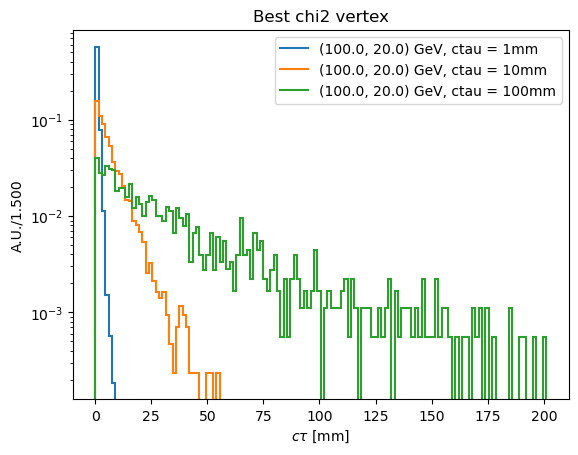

In [53]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'ctau',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 15j,
    'xlim': [0,200],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [100]
deltas = [0.2]
ctaus = [1,10,100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

### cos_collinear

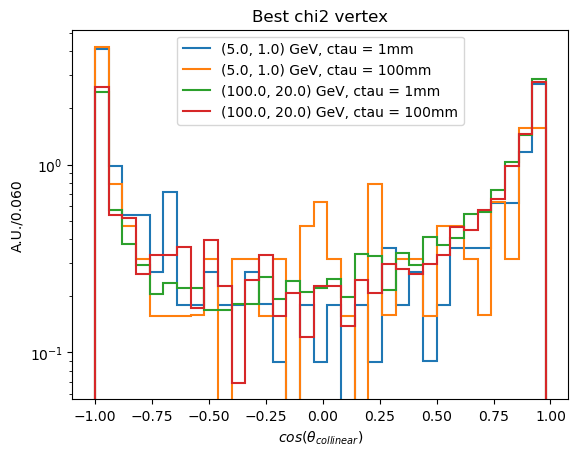

In [54]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow

}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 vertex')
plt.legend()
plt.show()

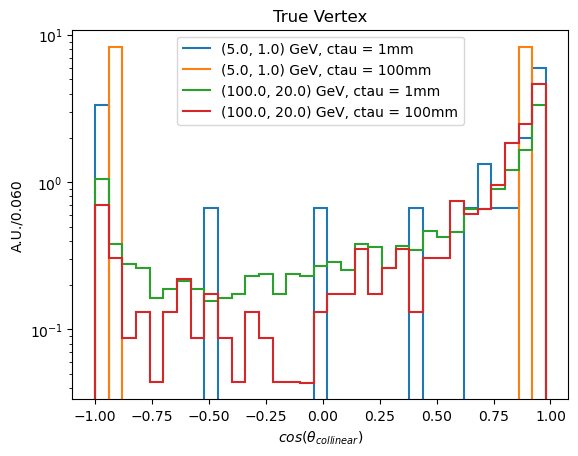

In [55]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Vertex')
plt.legend()
plt.show()

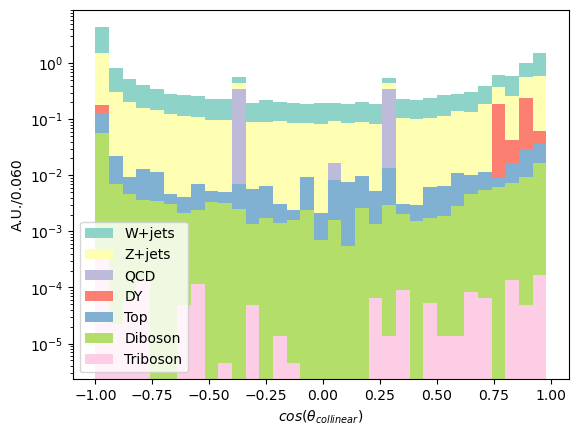

In [56]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### abs_cos_collinear

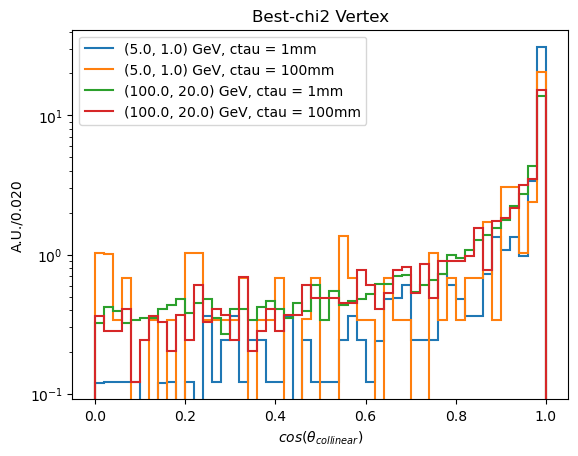

In [57]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'abs_cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

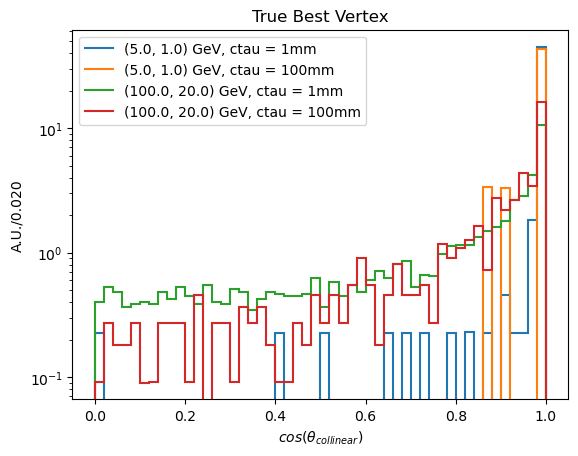

In [58]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'abs_cos_collinear',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

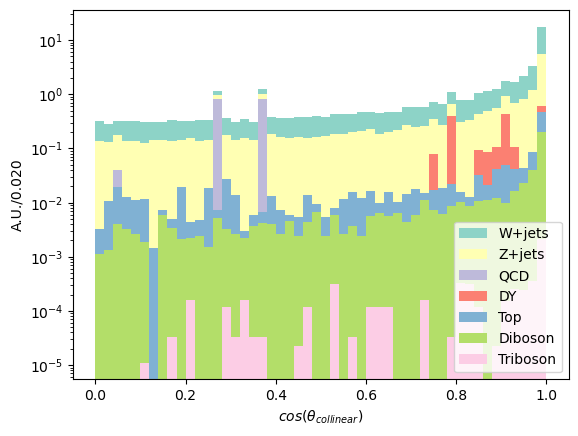

In [59]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_prod_eta

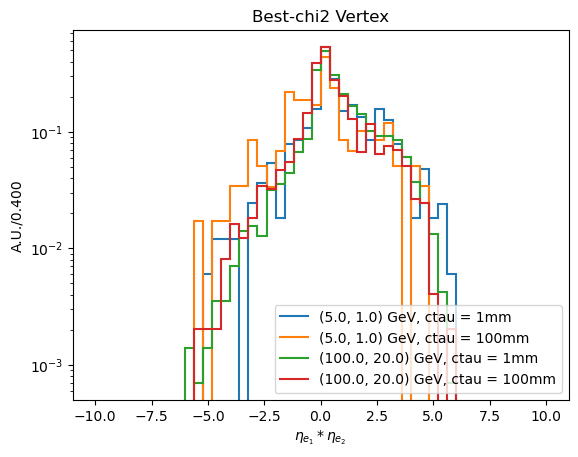

In [60]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_prod_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

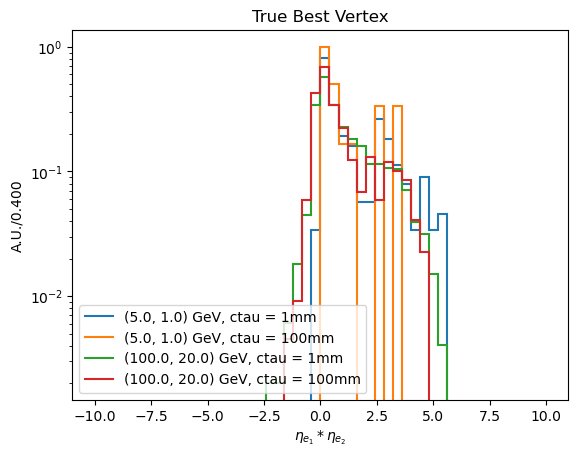

In [61]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_prod_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

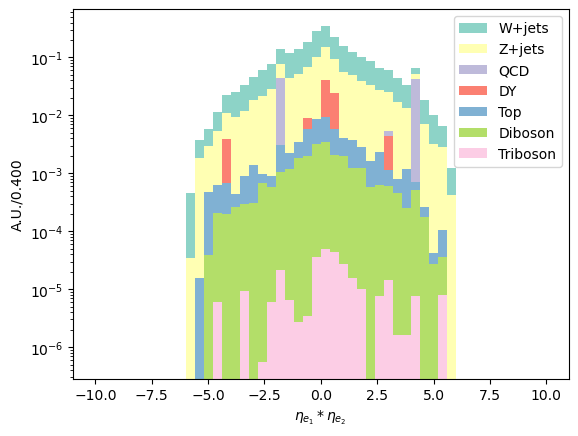

In [62]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_vxy

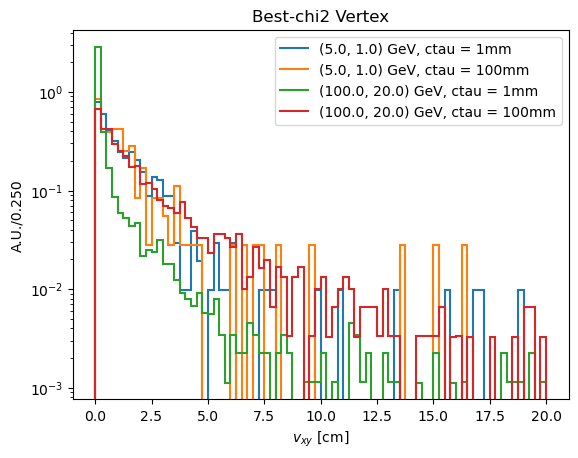

In [63]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 10j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

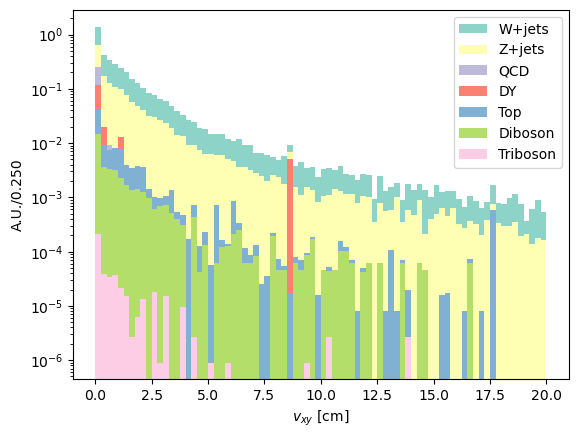

In [64]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

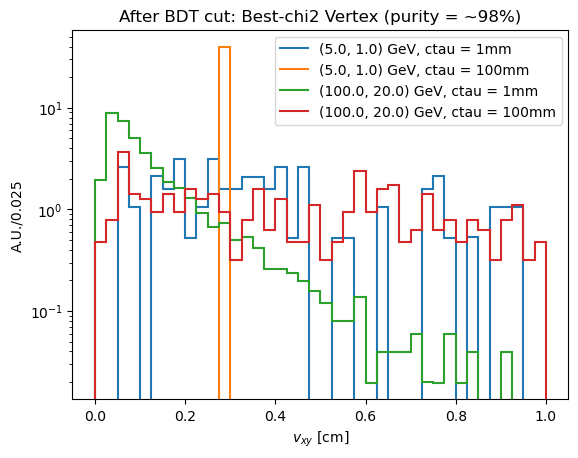

In [65]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('After BDT cut: Best-chi2 Vertex (purity = ~98%)')
plt.legend()
plt.show()

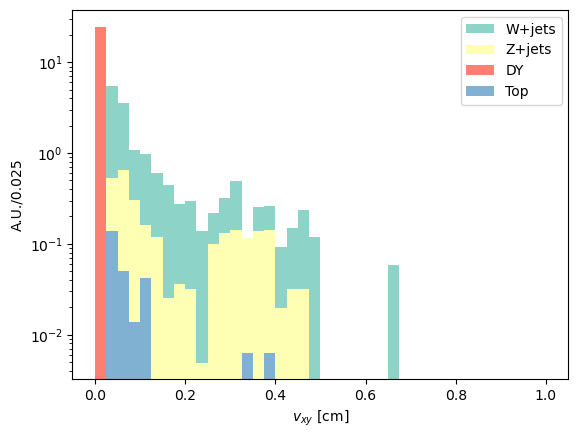

In [66]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY'])

### dxy1

KeyError: "'cut5' not in axis"

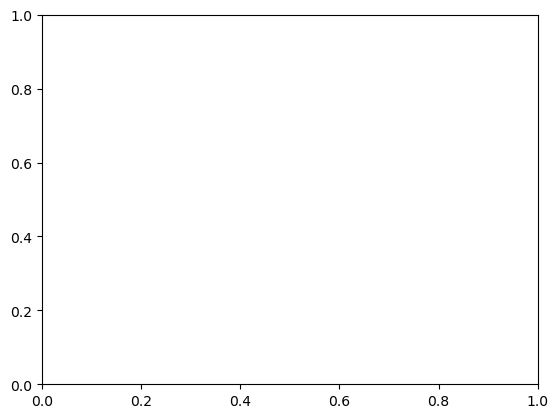

In [67]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dxy1',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'dxy(e1)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dxy2',
    'cut': 'cut5',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'dxy(e2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'dxy1_vs_dxy2',
    'cut': 'cut5',
}

style_2d_dict = {
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': 'dxy(e1)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'dxy(e2)',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDxy

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best-chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('After BDT cut: Best-chi2 Vertex (purity = ~98%)')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY', 'Diboson'])

### sel_vtx_minDz

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_deltaDxy

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dxy|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_deltaDz

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 5j,
    'xlim': [0,0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': r'$\Delta |dz|(e_{1},e_{2})$',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_vxySignif

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('After BDT cut: Best-chi2 Vertex (purity = ~98%)')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY'])

### sel_vtx_type

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [50]
deltas = [0.2]
ctaus = [1, 10, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_chi2

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY'])

### sel_vtx_dR

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY'])

### sel_vtx_dEta

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_dPhi

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_sign_eta

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_METdPhi

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_pt

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_eta

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_phi

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### sel_vtx_mass

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_dict)

plt.title('True Best Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass',
    'cut': 'cut10',
}

style_dict = {
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict, processes=['Top', 'W+jets', 'Z+jets', 'DY'])

### nLpt_Electron

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nLpt_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'n(low-pt electron)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nPF_Electron

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nPF_Electron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': 'n(PF electron)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nElectron

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nElectron',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

### nGoodVtx

In [ ]:
fig, ax = plt.subplots()

# Plot settings
plot_dict = {
    'variable': 'nGoodVtx',
    'cut': 'cut9',
}

style_dict = {
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': True,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
}

# signal points
m1s = [5, 100]
deltas = [0.2]
ctaus = [1, 100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            utils.plot_signal_1D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_dict)

plt.title('Best chi2 Vertex')
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()

# bkg
utils.plot_bkg_1d(ax, bkg_histos, plot_dict, style_dict)

# Plot 2D

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0,30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

fig, ax = plt.subplots()

utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict)

plt.title('All Background')
#utils.plot_bkg_2D(ax, bkg_histos, plot_dict, style_2d_dict, processes = ['Z+jets', 'W+jets', 'DY'])


In [ ]:

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_dict = {
    'xrebin': 2j,
    'yrebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 3j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### dxy1_vs_dxy2

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'dxy1_vs_dxy2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}


m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_mindxy

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_mindxy',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 0.5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_chi2

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_chi2',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 2j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_dR

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_dR',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_mass

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_mass',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [0, 30],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_METdPhi

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_METdPhi',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_vxySignif

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_vxySignif',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_pt

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_pt',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_sel_vtx_sign_eta

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_sel_vtx_sign_eta',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_true, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxy_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0, 20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDxy_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_minDz_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_minDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDxy_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDxy_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_deltaDz_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_deltaDz_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 10j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_vxySignif_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_vxySignif_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_chi2_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_chi2_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0,10],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dR_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dR_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dEta_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dEta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_dPhi_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_dPhi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [0, 5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_sign_eta_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_sign_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_pt_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_pt_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_eta_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_eta_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_phi_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_phi_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_mass_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_mass_vs_matchType',
    'cut': 'cut9',
}

style_2d_dict = {
    'xrebin': 2j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [5, 100]
deltas = [0.1]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()

### sel_vtx_type_vs_matchType

In [ ]:
# Plot settings
plot_dict = {
    'variable': 'sel_vtx_type_vs_matchType',
    'cut': 'cut9',
}
style_2d_dict = {
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': False,
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'flow': None,     # overflow
}

m1s = [50]
deltas = [0.2]
ctaus = [1, 100]

for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            fig, ax = plt.subplots()

            utils.plot_signal_2D(ax, sig_histo_best, m1, delta, ctau, plot_dict, style_2d_dict)
        
            plt.title(f'm1 = {m1}GeV, delta = {delta}, ctau = {ctau}mm')
            plt.show()